## Welcome to E-tivity 1

Your Name: Zheng Hanming

Your Student ID Number: 21225621

### Objective:
*Transition from a legacy contract originally set up for the use of LIBOR as a reference rate, to the use of a new
'3-month fallback rate' on the 1st business day of 2021, assuming that the 3-month LIBOR originally used in the contract
 ceases to be published on the 1st business day of March 2021.*

### Background Information

In Lecture 3 we met the **Historical Median Compounded Setting in Arrears** methodology. This methodology is the recommended 'fallback' approach
for long-lasting loan and swap contracts that were initially set up to pay a LIBOR-linked rate. In the event that LIBOR
ceases to be posted, repayment terms on these legacy contracts must 'fall back' to a new rate for calculating repayments, and
the **Historical Median Compounded Setting in Arrears** methodology describes how a new rate will be determined.

You can find more information on this methodology in the Reading Section on Sulis. You can also find more SONIA-specific
information here: https://www.bankofengland.co.uk/-/media/boe/files/markets/benchmarks/rfr/what-is-credit-adjustment-spread-supporting-slides.pdf and here: https://www.bankofengland.co.uk/-/media/boe/files/markets/benchmarks/rfr/rfrwg-what-is-compounded-sonia-and-term-sonia-slides.pdf

#### Determining the new 'fallback rate' involves 7 steps:
1. Making note of how often repayments or payment swaps have to be made in these contracts

2. Gathering data relating to the appropriate LIBOR setting, where the appropriate LIBOR setting is the setting that corresponds to the
 periodicity between repayments / swaps
    - i.e. daily payments will use Overnight LIBOR as a basis for determining interest payments, monthly payments will use the 1-month LIBOR, quarterly payments use the 3-month LIBOR, and so on.

3. Gathering data relating to the overnight rates for the new market reference rate. The new market reference rate in the
 US is **SOFR** (the Secured Overnight Financing Rate), while the new market reference rate in the UK is **SONIA** (the Sterling Overnight Index Average rate).

4. Calculating 'compounded' versions of the new overnight reference rates, where the 'compounding' period corresponds to the periodicity of payments on the contract.
 Turning overnight rates in to compounded rates involves the use of the **Compounded Setting in Arrears** formula. Using
 the SONIA rate as an example, this formula is represented mathematically as $\left[ \prod_{i=1}^{d_b} (1+\frac{SONIA_i \times n_i}{360}) -1 \right] \times \frac{360}{d_c}$, where
    - $d_b$ = number of business days in the contract, or between contracted payments
        - i.e. contracts may specify payments every 62 business days, which is approx. 90 calendar days.
    - $SONIA_i$ = SONIA on day $i$.
    - $n_i$ = number of calendar days SOFR will apply. Most of the time (excluding bank holidays and holiday periods), this will be '1' for Monday-Thursday, or '3' for Friday.
    - $d_c$ = number of calendar days in the contract, or between contracted payments
        - i.e. if contracts specify payments every 62 business days, this corresponds to approx. 90 calendar days.
    - *sidenote: It is **compounded** because of the $\prod$ term. It is **set in arrears** as the rate owed only becomes
     known at the end of the payment period. For example, if a 3-month payment period begins on the 1st January, the rate
      owed on 1st April is no longer set in advance (which would typically be the 3m LIBOR on the 1st January). Instead,
       the rate owed for the payment period beginning on the 1st January is based on the daily SONIA rates recorded between
        the 1st January and 31st March, which are then compounded on the final date to determine the 3-month rate owed.*

5. Once the compounded rates have been determined, find the difference between the Compounded Setting in Arrears rates and the LIBORs each day over the 5 years prior to the cessation of LIBOR.

6. Calculate the median difference between the compounded rates and the LIBORs.

7. The fallback rate going forward is the prevailing day's 'Compounded Rate' + the median difference calculated in Step 6.


## 1. Library Requirements

Install required libraries and import data as a `pandas` Dataframe:

In [20]:
#!pip install jupyter - must do this manually

In [21]:
#!pip install -U setuptools
#!pip install pandas numpy matplotlib

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
daily_rates = pd.read_csv('./SONIA_LIBOR.csv', index_col=[0])
daily_rates.head()

SONIA  ON_LIBOR  3m_LIBOR
Date                                 
04-Jan-16  0.4648   0.47813   0.59125
05-Jan-16  0.4676   0.47750   0.58938
06-Jan-16  0.4717   0.47750   0.59000
07-Jan-16  0.4668   0.47750   0.58938
08-Jan-16  0.4660   0.47750   0.58938

#### Rates Included
- **SONIA**: SONIA for a single-night loan. Overnight (new) market reference rate. Used to form 3-month SONIA Compounded Setting in Arrears Rate.
- **ON_LIBOR**: LIBOR for a single-night loan. Overnight (old) market reference rate. Not functionally relevant for this
e-tivity. Used to demonstrate difference between old and new rates in figure below.
- **3m_LIBOR**: LIBOR for a 3-month loan. Rate the 'legacy contract' in our example is based on, which is to be replaced
 with a new 'fallback rate'. Its function in this e-tivity is to be used as a benchmark so that the fallback spread (the
 median historical difference between the 'old and the new' reference rates) can be calculated.

## 2. Data Exploration:

Let's have a look at a summary of the data we have: number of observations, average rate(s), and distributions of rates.

In [24]:
daily_rates.describe().transpose().style.format("{:.2f}")

Daily SONIA rates and Daily LIBORs are very similar, while the 3-month LIBORs have a higher average and maximum. This
reflects the fact that longer loan / repayment horizons are associated with higher levels of implied risk, due to the
higher amount of future uncertainty involved (as a lender, you would feel a lot more confident about a one-night loan
being returned than a 3-month loan being returned, and you would price the interest rate charged accordingly).

In [25]:
daily_SONIA = daily_rates['SONIA']/100
daily_LIBOR = daily_rates['ON_LIBOR']/100
ThreeMonth_LIBOR = daily_rates['3m_LIBOR']/100

Continuing on with our examination of the different rates by plotting them all on the same graph.

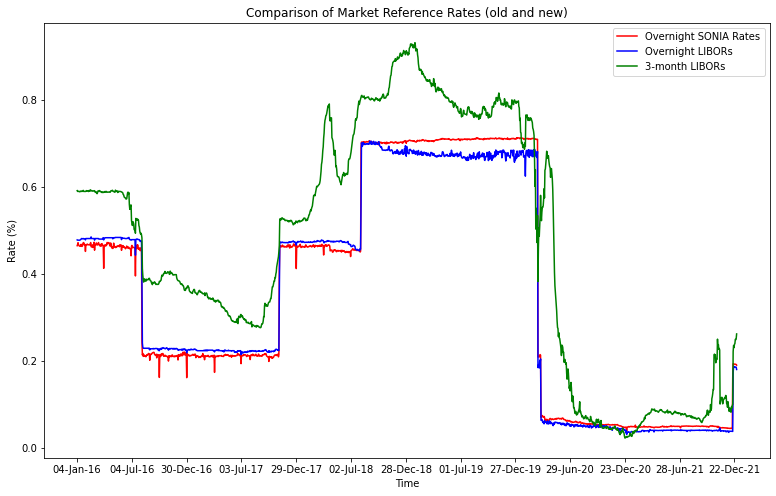

In [26]:
fig, ax = plt.subplots(figsize = (13,8))

ax.plot(daily_rates.index, daily_SONIA*100, color='red', label='Overnight SONIA Rates')
ax.plot(daily_LIBOR*100, color='blue', label='Overnight LIBORs')
ax.plot(ThreeMonth_LIBOR*100, color='green', label='3-month LIBORs')
ax.set_xticks(ax.get_xticks()[::126])

ax.set(title="Comparison of Market Reference Rates (old and new)",
       xlabel='Time',
       ylabel='Rate (%)')
ax.legend()

plt.show()

All rates follow the same 'trend', but the 3 month rate shows greater levels of deviation on a day-to-day basis. This
reflects the fact that longer loan / repayment horizons are associated with higher levels of implied risk, due to the
higher amount of future uncertainty involved. The figure also confirms that while the overnight rates may be closely-aligned,
the 3-month rates have a number of random spikes throughout, indicating that longer-term rates more erratic and reactive
to perceptions of market stress.

## 3. E-tivity Actions

#### Objective
*Transition from a legacy contract originally set up for the use of LIBOR as a reference rate, to the use of a new
'3-month fallback rate', assuming that the 3-month LIBOR originally used in the contract ceases to be published on
the 1st business day of 2021.*

### Task Breakdowns:
1. Calculate the 3-month Compounded Setting in Arrears SONIA Rates from the dataframe of overnight SONIA rates.
2. Compare these compounded rates to historical 3-month LIBORs
3. Find the median difference between the two time series, which will serve as the 'fallback spread' to add to the
compounded SONIA rate going forward.

## Task 1

One of the primary challenges associated with compounding overnight rates over a period of time is ensuring that the relative
weights of each overnight rate is accurately accounted for. Key to this is knowing **how long** each posted overnight rate
will apply.

#### Objective
Compute the array $n$, containing all $n_i$.

#### Further details
Based on the dates provided in the `daily_rates` dataframe, discern the number of calendar days between each successive
overnight rate, so that it's relative 'influence' in the compounding formula can be more accurately assessed.

*Hint: use '.index' on the relevant dataframe*

In [27]:
"""
Passes in a dataframe of dates corresponding to the new overnight reference rates, and returns the number of calendar
days between each business day.

Parameters
---------
rate_dates : df
    The dataframe to pass in, that is populated with business days.

Returns
-------
days_between_dates : list
    A list containing the number of cazlendar days between each successive business day in the rate_dates dataframe.
"""

def retrieve_ni(rate_dates):
    days_between_dates = []

    for i in range(len(rate_dates)-1):
        ##### ** YOUR CODE STARTS HERE ** #####
        end_date = pd.to_datetime(rate_dates[i+1])
        start_date = pd.to_datetime(rate_dates[i])
        days_between_dates.append((end_date - start_date).days)
        ##### ** YOUR CODE ENDS HERE ** #####
    return days_between_dates

In [28]:
##### ** YOUR CODE STARTS HERE ** #####
n_i = retrieve_ni(daily_rates.index)
##### ** YOUR CODE ENDS HERE ** #####

## Task 2

We briefly discussed it in Lecture 3, but when working our way through the **compounding setting in arrears** formula, we
 were quick to decipher that there were two distinct 'stages' in calculating the final compound rate:

1. the daily multipliers, which represent the interest rates accrued on a daily basis that are to be multiplied together over the relevant payment period, and
2. the 'compounding', or multiplying, which is completed at the end of the payment / swap window period (7 days, 1 month, 3 months, etc.)

It is much easier to calculate the 'compounding' when we have the daily accrued 'interests rate multipliers' readily available for the entire compounding period.

#### Objective
Compute the daily 'interest accrued' and 'interest multipliers' figures for the entire observation period (2016-2022).

#### Further details

*Hint: Check Slide 7 in Lecture 3 to figure out the relevant part of $\left[ \prod_{i=1}^{d_b} (1+\frac{SONIA_i \times n_i}{360}) -1 \right] \times \frac{360}{d_c}$ to compute.*

In [29]:
"""
Passes in a dataframe of dates corresponding to the new overnight reference rates, and returns the interest rate multipliers
corresponding to 1. each day's SONIA, and 2. the number of days each SONIA applies for.

Parameters
---------
daily_ON_rates : df
    The dataframe to pass in, that is populated with overnight rates.
n_i : list
    A list containing the number of calendar days between each successive business day in the rate_dates dataframe.
daycount_convention : int
    Describes the number of calendar days in a year from the perspective of the lending firm. The number serves as the
    denominator when turning an annual rate into a daily rate. Most debt markets use '360' as the denominator.

Returns
-------
interest_multiplier : list
    A list containing the daily interest multiplier to be applied to a loan amount to discern repayment requirements on
    a single-day loan, inclusive of interest (baseline of 1 = no interest owed).
"""


def find_daily_interest_multipliers(daily_ON_rates, n_i, daycount_convention=360):

    interest_accrued = []
    interest_multiplier = []

    for i in range(len(daily_ON_rates)-1):

        ##### ** YOUR CODE STARTS HERE ** #####
        interest_accrued.append((daily_ON_rates[i]*n_i[i])/daycount_convention)
        interest_multiplier.append(1+interest_accrued[i])
        ##### ** YOUR CODE ENDS HERE ** #####

    return interest_multiplier


In [30]:
##### ** YOUR CODE STARTS HERE ** #####
daily_multipliers = find_daily_interest_multipliers(daily_SONIA, n_i)
##### ** YOUR CODE ENDS HERE ** #####


## Task 3

Now that the daily multipliers have been calculated, it is time to calculate the annual representation of the 3-month
compounded rates for each day from 2016-2022.

#### Objective
Compute the 'Annual Compounded Rate of Interest' figures for the entire observation period (2016-2022, minus the last 3 months).

#### Further details
You have calculated a portion of $\left[ \prod_{i=1}^{d_b} (1+\frac{SONIA_i \times n_i}{360}) -1 \right] \times \frac{360}{d_c}$ in Task 2. Now it is time to calculate the rest of the formula, and use a 'for'
loop to repeat this operation for all days in the observation period. You may find Lecture 3 Slide 7 helpful in terms of
the computation steps to complete, and Slide 8 helpful in terms of the 'sliding window' approach that necessitates the
use of a 'for' loop.

Remember that this is a rate 'set in arrears', which means that the first day's compounded rate can only be
calculated at the end of the payment period window. This should be reflected in the start position of your 'for' loop, before
you compute the rest of the formula.

*Hint: use the mathematical functions in the `numpy` package (`sum`, `multiply`, `divide`, `product`) in your computations.*

In [31]:
# print(daily_multipliers)

In [32]:
"""

Passes in a list of interest rate multipliers, and returns the annual representation of the 3-month Compounded SONIA rate.

Parameters
---------
n_i : list
    A list containing the number of calendar days between each successive business day in the rate_dates dataframe.
daily_multipliers : list
    A list containing the daily interest multiplier to be applied to a loan amount to discern repayment requirements on
    a single-day loan, inclusive of interest (baseline of 1 = no interest owed).
payment_periodicity : int
    Describes the number of business days between each payment in the contract. Weekly payments are typically '5' business days,
    monthly rates are typically '21-22' business days, and 3-monthly payments are typically '62-65' business days. For the
    purposes of this e-tivity, we will use 62 business days to represent 3-month rates.
daycount_convention : int
    Describes the number of calendar days in a year from the perspective of the lending firm. The number serves as the
    denominator when turning an annual rate into a daily rate. Most debt markets use '360' as the denominator.

Returns
-------
annual_compounded_rate : list
    A list containing the the annual representation of the 3-month Compounded SONIA rate.
"""

def interest_multipliers_to_compounded_rate(n_i, daily_multipliers, payment_periodicity=62, daycount_convention=360):
    compounded_payment_period_rate = []
    annual_compounded_rate = []
    payment_periodicity = payment_periodicity-1

    for i in range(payment_periodicity, len(daily_multipliers)):
        ##### ** YOUR CODE STARTS HERE ** #####
        calculation_window_start = i - payment_periodicity
        calculation_window_end = i + 1

        total_days_between_payments = np.sum(n_i[calculation_window_start : calculation_window_end])
        compounded_payment_period_rate.append(np.product(daily_multipliers[calculation_window_start : calculation_window_end]))
        annual_compounded_rate.append((compounded_payment_period_rate[calculation_window_start] - 1)*360/total_days_between_payments)
        ##### ** YOUR CODE ENDS HERE ** #####

    return annual_compounded_rate

In [33]:
##### ** YOUR CODE STARTS HERE ** #####
compounded_rates = interest_multipliers_to_compounded_rate(n_i, daily_multipliers)
##### ** YOUR CODE ENDS HERE ** #####
# Turn the list of rates into a DataFrame, to allow for easier plotting later on
compounded_rates = pd.DataFrame(compounded_rates)

## Task 4

Tasks 1-3 involved calculating the 3-month compounded SONIA rates. Now we must set in motion the means to calculate the
fallback rate. Task 4 involves calculating the fallback 'spread', which is the median historical difference between
the 3-month LIBORs and 3-month Compounded SONIAs over the last 5 years.

#### Objective
Compute the 'Annual Compounded Rate of Interest' figures for the entire observation period (2016-2022, minus the last 3 months).

#### Further details
As we met in Lecture 3, the `fallback rate` = `compounded SONIA` + `fallback spread`, where the fallback spread is the
median historical difference between LIBOR the new reference rate over the last 5 years. Seeing as the initial task called
for the 'legacy contract' to switch to the fallback rate on the 1st business day of 2021, that means we must calculate the
median difference for the first ~1265 values in the dataset.

*Hint: Use `np.subtract` and `np.median`.*

In [34]:
"""

Calculates the median spread, or % difference, between the old and the new reference rate on a daily basis over time.

Parameters
---------
compounded_rate_set : list
    A list containing the compounded reference rates
LIBOR_set : list
    A list containing the old reference rates (in this case, LIBOR).
start_calc_period : int
    Position in the list of rates from which the 'historical median' calculation must start.
end_calc_period : int
    Position in the list of rates from which the 'historical median' calculation must start.

Returns
-------
median_spread : float
    Historical median spread, or % difference, between the old and the new reference rate on a daily basis ovrr time.
"""

def fallback_spread_calculator(compounded_rate_set, LIBOR_set, start_calc_period = 0, end_calc_period = 1265):
    daily_spreads = []
    compound_values = compounded_rate_set.values.squeeze()
    LIBOR_values = LIBOR_set.values.squeeze()
    # ^ unformatted raw values required only. Otherwise would be comparing a Series and a Dataframe.

    ##### ** YOUR CODE STARTS HERE ** #####
    offset = len(LIBOR_values)-len(compound_values)
    daily_spreads.append(np.subtract(LIBOR_values[start_calc_period:end_calc_period], compound_values[0:end_calc_period - offset]))
    median_spread = np.median(daily_spreads)
    ##### ** YOUR CODE ENDS HERE ** #####

    return median_spread

In [35]:
##### ** YOUR CODE STARTS HERE ** #####
fallback_spread = fallback_spread_calculator(compounded_rates, ThreeMonth_LIBOR, 62, 1265)
##### ** YOUR CODE ENDS HERE ** #####
fallback_spread


0.0011121468471851875

In [36]:
fallback_rates = compounded_rates + fallback_spread

And that's it! You can now complete the 'legacy contract' transition from the old benchmark (LIBOR) to the new fallback rate
(Compounded SONIA + fallback).

## 4. Extra Content: Comparing the Fallback Rate to 3m LIBOR

Setting the first 5 years over the fallback rate to be `None`, to allow for easier plotting.

In [37]:
fallback_rates[0:1265] = None

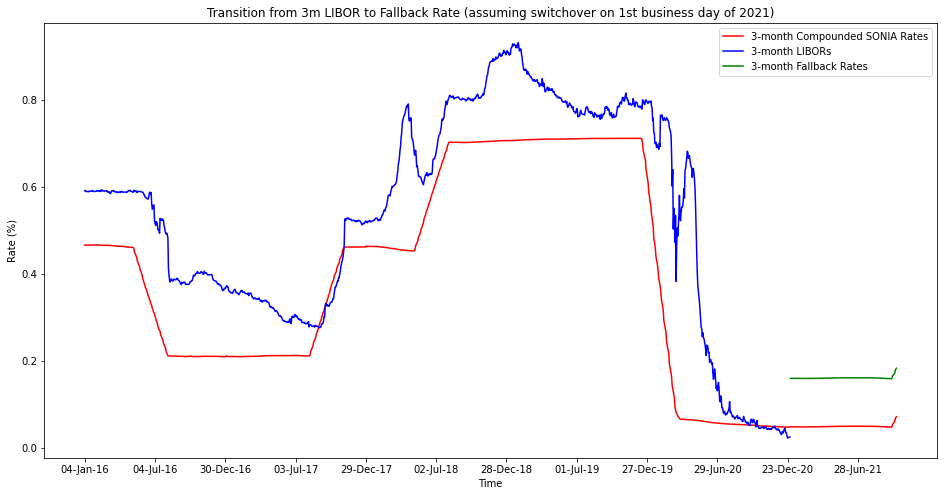

In [38]:
fig, ax = plt.subplots(figsize = (16,8))

ax.plot(daily_rates.index[:len(compounded_rates)], compounded_rates.values*100, color='red', label='3-month Compounded SONIA Rates')
ax.plot(ThreeMonth_LIBOR[:1265]*100, color='blue', label='3-month LIBORs')
ax.plot(fallback_rates.values*100, color='green', label='3-month Fallback Rates')
ax.set_xticks(ax.get_xticks()[::126])

ax.set(title="Transition from 3m LIBOR to Fallback Rate (assuming switchover on 1st business day of 2021)",
       xlabel='Time',
       ylabel='Rate (%)')
ax.legend()

plt.show()

Plotting the rates show that on the day of transition, the borrower who was originally exposed to LIBOR may take on initial
losses (due to the ~0.11% jump from the LIBOR to the Fallback rate at the start of 2021), but the spread appears to be
consistent with the historical difference between LIBOR and SONIA, so losses may average out over time.

Note also that while the tasks you completed in this notebook were centred on computing a 3-month fallback rate, the figures can
be amended to account for contracts that use 1-week, 1-month, etc. payment periods instead of 3-months.